<a href="https://colab.research.google.com/github/michaeldouglas/mba_IA_ML-proj_int-grupo_b/blob/main/Python/Trabalho_deep_learning_reinforcement_learning/Fashion_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercício 4

Utilizando o dataset Fashion MNIST, construa uma CNN para a
classificação do dataset.

Dicas:
*   Utilize a LetNet-5 como exemplo bem como o exemplo visto em sala de aula do dataset minst
*   Utilize o comando (x_train, y_train), (x_test, y_test) =
tf.keras.datasets.fashion_mnist.load_data() para carregar o dataset.
*   Os labels da classe são os seguintes:

1.   T-shirt/top
2.   Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot





In [1]:
#@title Importação das bibliotecas
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.utils.vis_utils import plot_model

In [2]:
#@title Carregamento da base
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
#@title Normalização dos dados
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
#@title Reformulação dos dados
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### Decisões

Decidimos em normalizar os dados e também deixar os dados reshapeados para se adaptarem à entrada da nossa rede neural. As labels são convertidas em arrays utilizando a técnica de "one hot encoded".

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
#@title Define a arquitetura da rede
model = keras.Sequential([
    keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(16, (5, 5), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
#@title Compila a rede
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
#@title Treina a rede
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 46s 23ms/step - loss: 0.5656 - accuracy: 0.7909 - val_loss: 0.4403 - val_accuracy: 0.8397
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3785 - accuracy: 0.8617 - val_loss: 0.3884 - val_accuracy: 0.8612
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3322 - accuracy: 0.8770 - val_loss: 0.3700 - val_accuracy: 0.8634
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3032 - accuracy: 0.8894 - val_loss: 0.3162 - val_accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2835 - accuracy: 0.8932 - val_loss: 0.3216 - val_accuracy: 0.8813
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2650 - accuracy: 0.9010 - val_loss: 0.3266 - val_accuracy: 0.8789
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2517 - accuracy: 0.9050 - val_loss: 0.2999 -

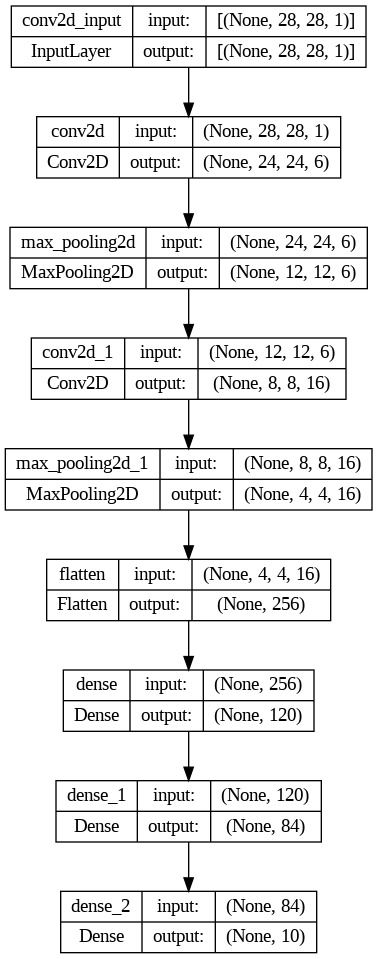

In [9]:
#@title Plot das camadas
plot_model(model, to_file='pulsar.png', show_shapes=True, show_layer_names=True)

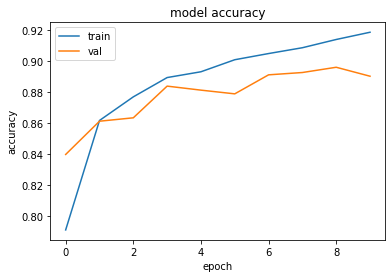

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
#@title Acurácia do nosso modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


accuracy: 89.03%


In [12]:
#@title Teste de predição
y_pred_out = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [13]:
y_pred_out

array([[4.49197790e-09, 2.64611336e-12, 1.30881287e-11, ...,
        1.44337537e-04, 2.73146838e-09, 9.99736071e-01],
       [1.99381411e-05, 1.36510215e-12, 9.97462571e-01, ...,
        2.51943865e-11, 1.15431732e-07, 1.19667956e-10],
       [6.94386472e-15, 9.99999940e-01, 1.70210609e-18, ...,
        2.71914653e-27, 3.28669853e-16, 4.44207625e-25],
       ...,
       [1.03127480e-08, 1.12670925e-14, 7.26366134e-10, ...,
        8.21255997e-12, 9.99999940e-01, 1.37635517e-15],
       [1.62579492e-10, 9.99999940e-01, 1.97396312e-13, ...,
        9.36253062e-18, 2.46607679e-10, 1.10484820e-16],
       [1.27873922e-04, 7.42387192e-06, 4.45324667e-06, ...,
        5.33282571e-02, 1.59835152e-03, 6.51901646e-04]], dtype=float32)

In [14]:
y_pred_out > 0.5

array([[False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [15]:
y_pred_classes = (y_pred_out > 0.5).astype(int) 
y_pred_classes

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Exemplo de previsão 

Aqui fizemos um pequeno exemplo de previsão de imagens do nosso modelo.

1/1 [==============================] - 0s 25ms/step


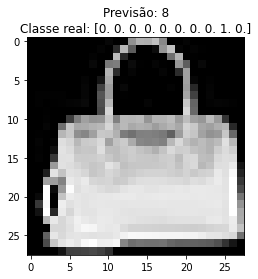

Previsão: 8
Classe real: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [16]:
random_index = np.random.randint(0, x_test.shape[0])
img = x_test[random_index]

prediction = model.predict(np.array([img]))

plt.imshow(img[:, :, 0], cmap='gray')
plt.title("Previsão: " + str(np.argmax(prediction[0])) + "\nClasse real: " + str(y_test[random_index]))
plt.show()

print("Previsão:", np.argmax(prediction[0]))
print("Classe real:", y_test[random_index])

### Considerações finais

O nosso modelo chegou em uma acurácia de 90.08%. Isso fornece um bom alvo para classificar amostras e determinar qual é o tipo do objeto análisado.